In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from scipy.linalg import expm, eig
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, BasicAer, execute
from operators.pauli_hamiltonian import PauliHamiltonian
import matplotlib.pyplot as plt
from utils.circuits import add_crx, add_ccrx
from quantum_circuit.trotterization import trotter_electric, trotter_coupling, trotter_plaquette
qiskit.__version__

'0.12.0'

[[-1. -1. -1.  0.]
 [-1.  1.  0. -1.]
 [-1.  0.  1. -1.]
 [ 0. -1. -1. -1.]]


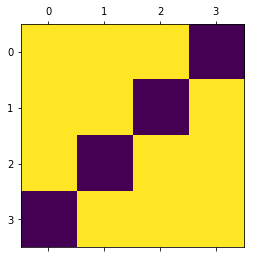

In [2]:
Jz = 1.0
Jx = 1.0
H = PauliHamiltonian([-Jz,-Jx,-Jx],[{0 : "Z",1 : "Z"},{0 : "X"},{1 : "X"}],2)
print(H.matrix_form())

plt.matshow(np.abs(H.matrix_form()))
plt.show()

In [3]:
# Initialize Simulator
backend = BasicAer.get_backend('unitary_simulator')

In [4]:
# Construct Circuit
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
#circ = trotter_circuit(circ, qr, H, T, 10)
circ.draw()


qr_0: |0>
         
qr_1: |0>

In [5]:
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [6]:
# Compare the exact unitary and trotterized unitary
print(exact-trotterized)

NameError: name 'exact' is not defined

In [ ]:
tr_spectra = []
for n_steps in range(10):
    # Construct Circuit
    qr = QuantumRegister(2, 'qr')
    circ = QuantumCircuit(qr)
    circ = trotter_circuit(circ, qr, H, T, n_steps)
    job = execute(circ, backend)
    eigvals, _ = eig(job.result().get_unitary(circ, decimals=3))
    tr_spectra.append(eigvals)
plt.plot(range(10), tr_spectra, label='Trotterized')
plt.plot(range(10), np.tile(np.reshape(spectrum, [1, -1]), [10, 1]), linestyle='--', label='scipy')
plt.xlabel("# Steps")
plt.ylabel("Spectrum")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [ ]:
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ.cx(qr[0], qr[1])
#circ.cx(qr[1], qr[2])
circ.rx(np.pi/2, qr[1])
#circ.cx(qr[1], qr[2])
circ.cx(qr[0], qr[1])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

In [ ]:
X = np.array([[0, 1], [1, 0]])
eX = expm(1j*np.kron(X, X)*np.pi/4)
print(np.around(eX, decimals=3))

In [ ]:
qr = QuantumRegister(1, 'qr')
circ = QuantumCircuit(qr)
circ.ry(np.pi/4, qr[0])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

In [ ]:
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
#circ.cx(qr[1], qr[0])
#circ.x(qr[0])
#circ.cx(qr[0], qr[1])
circ.cu3(-np.pi/2, np.pi/2, -np.pi/2,  qr[0], qr[1])
#circ.cx(qr[0], qr[1])
#circ.x(qr[0])
#circ.cx(qr[1], qr[0])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

In [ ]:
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ.u1(np.pi/2, qr[1])
circ.cx(qr[0], qr[1])
circ.u3(-np.pi/4, 0, 0, qr[1])
circ.cx(qr[0], qr[1])
circ.u3(np.pi/4, 0, 0, qr[1])
circ.u1(-np.pi/2, qr[1])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

In [ ]:
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ.crx(np.pi/4, qr[0], qr[1])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)


In [ ]:
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ = add_crx(circ, np.pi/4, qr[0], qr[1])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

In [ ]:
qr = QuantumRegister(3, 'qr')
circ = QuantumCircuit(qr)
circ = add_ccrx(circ, np.pi/4, qr[2], qr[1], qr[0])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

In [ ]:
Sz = np.array([[1, 0], [0, -1]])
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ = trotter_electric(circ, qr, [0, 1], 1, 0.5)
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)
print(expm(-1j*np.kron(Sz, Sz)*1*0.5))

In [ ]:
qr = QuantumRegister(1, 'qr')
circ = QuantumCircuit(qr)
coef = np.pi/8
deltaT = 1
target_indices = [0, 1]
"""
circ.x(qr[0])
circ.u3(0, 0, np.pi/8, 0)
#circ.u3(-np.pi, 0, -np.pi, 0)
circ.x(qr[0])
circ.u3(0, 0, -np.pi/8, 0)
#circ.u3(-np.pi, 0, -np.pi, 0)
"""
from qiskit.quantum_info.operators import Operator
circ.rz(np.pi/4,0)
circ.unitary(Operator([[0, 1], [1, 0]]), [0])
#circ.x(qr[0])
#circ.u3(np.pi, 0, np.pi, 0)
circ.rz(-np.pi/4,0)
circ.unitary(Operator([[0, 1], [1, 0]]), [0])
#circ.x(qr[0])
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)
print(expm(-1j*np.kron(Sz, Sz)*1*0.5))
circ.draw()

In [ ]:
Sp = np.array([[0, 1], [0, 0]])
Sm = np.array([[0, 0], [1, 0]])
qr = QuantumRegister(3, 'qr')
circ = QuantumCircuit(qr)
for i in range(10):
    circ = trotter_plaquette(circ, qr, [0, 1, 2], 1, 0.1)
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)
print(expm(-1j*(np.kron(np.kron(Sp, Sp), Sp)+np.kron(np.kron(Sm, Sm), Sm))*1*1))
plt.matshow(np.abs(trotterized_unitary))
plt.show()
plt.matshow(np.abs(expm(-1j*(np.kron(np.kron(Sp, Sp), Sp)+np.kron(np.kron(Sm, Sm), Sm))*1*1)))
plt.show()

In [ ]:
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
for i in range(10):
    circ = trotter_coupling(circ, qr, [0, 1], 1, 0.1)
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)
print(expm(-1j*(np.kron(Sp, Sm)+np.kron(Sm, Sp))*1*1))
plt.matshow(np.abs(trotterized_unitary))
plt.show()
plt.matshow(np.abs(expm(-1j*(np.kron(Sp, Sm)+np.kron(Sm, Sp))*1*1)))
plt.show()